In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras.datasets import cifar10

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

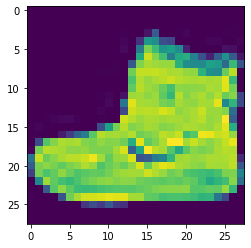

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_name[y_train[0]]

'Ankle boot'

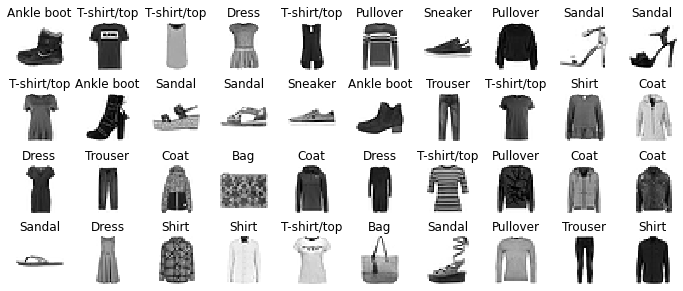

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for rows in range(n_rows):
  for col in range(n_cols):
    index = n_cols * rows + col
    plt.subplot(n_rows,n_cols,index + 1)
    plt.imshow(x_train[index], cmap = 'binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_name[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()


**ANN Classifiction**

In [ ]:
from keras.models import Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300,kernel_initializer='uniform'),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    
])


In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2012 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1966 - accuracy: 0.9282
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1926 - accuracy: 0.9300
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1903 - accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1854 - accuracy: 0.9322
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1829 - accuracy: 0.9340
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1791 - accuracy: 0.9346
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1761 - accuracy: 0.9359
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1720 - accuracy: 0.9371
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss:

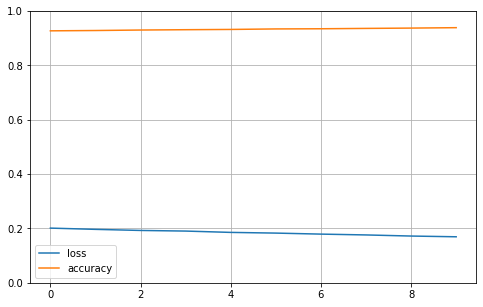

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.8945


[0.3176953196525574, 0.8945000171661377]

1/1 [==============================] - 0s 86ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
print(class_name[np.argmax(predictions[2])])

Trouser


In [ ]:
print(class_name[y_test[2]])

Trouser


cifar dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10


In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(x_train,y_train), (x_test,y_test) = cifar.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

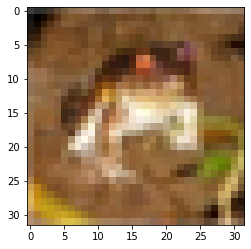

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(32,kernel_initializer = 'uniform'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [ ]:
model.fit(x_train,y_train,epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 6s 3ms/step - loss: 2.2173 - accuracy: 0.1505
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9633 - accuracy: 0.2584
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8274 - accuracy: 0.3233
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7689 - accuracy: 0.3484
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7145 - accuracy: 0.3697
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6760 - accuracy: 0.3885
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6360 - accuracy: 0.4018
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6070 - accuracy: 0.4185
Epoch 9/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5857 - accuracy: 0.4251
Epoch 10/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.56

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5026 - accuracy: 0.4616


In [ ]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
print(names[np.argmax(prediction[2])])

ship


In [ ]:
print(names[y_test[2][0]])

ship


**ANN Linear Regression**

In [ ]:
df = pd.read_excel('/content/Folds5x2_pp.xlsx')

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.isnull().sum()

Average Temperature                    0
Exhaust Vacuum                         0
Ambient Pressure                       0
Relative Humidity                      0
Net Hourly Electrical Energy Output    0
dtype: int64

In [ ]:
df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
X = df.drop('Net Hourly Electrical Energy Output',axis = 1).values
y = df['Net Hourly Electrical Energy Output'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7654, 4) (7654,) (1914, 4) (1914,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(6,activation = 'relu'),
    tf.keras.layers.Dense(1)   #For logistic add activation = 'sigmoid'
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error') #for logistic loss = 'binary_crossentropy'

In [ ]:
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test),callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 205777.5625 - val_loss: 203658.7344
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 198883.3594 - val_loss: 191100.7969
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 178520.9531 - val_loss: 162384.5625
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 140516.0938 - val_loss: 116279.5469
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 92349.8828 - val_loss: 69840.5703
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 53231.3242 - val_loss: 39564.3398
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 31839.5645 - val_loss: 25572.6133
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 22338.1328 - val_loss: 19269.6309
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 17562.3750 - val_loss: 15630.7754
Epoch 10/10

In [ ]:
model.evaluate(x_train,y_train)

240/240 [==============================] - 0s 2ms/step - loss: 22.7341


22.734142303466797

In [ ]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 22.9825


22.982467651367188

In [ ]:
prediction = model.predict(x_test)
prediction_df = pd.DataFrame(np.ravel(prediction),columns=['Predictions'])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=['Real Value']),prediction_df],axis = 1)
comparison_df

60/60 [==============================] - 0s 1ms/step


,Real Value,Predictions
0,455.27,454.774597
1,436.31,436.886810
2,440.68,432.337708
3,434.40,436.898010
4,482.06,479.471802
...,...,...
1909,430.24,432.107330
1910,473.20,474.938171
1911,479.53,481.681824
1912,435.76,433.669250
